**Project Title**: Predicting Apple Inc. Stock Prices Using Machine Learning Models




---



**QUESTION**

- Can we accurately predict the stock prices of Apple Inc. using historical stock data and machine learning models such as Random Forest and LSTM?



**GOALS**
- Perform feature engineering and normalization on historical stock data.
- Develop predictive models using Random Forest and LSTM algorithms to forecast Apple Inc.'s stock prices.
- Evaluate the models' performance using various metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R²).

- Visualize the models' predictions against actual values and analyze feature importance.

- Compare the performance between traditional machine learning (Random Forest) and deep learning (LSTM) models.

**USE CASE:** Forecasting stock prices is a significant challenge in the financial sector. Accurate predictions can help investors make informed decisions, manage risks, and optimize their portfolios.

This project aims to develop models that can predict the stock prices of Apple Inc. with high accuracy using historical data.



---



In [1]:
install.packages("tidyverse")
install.packages("lubridate")
install.packages("forecast")
install.packages("caret")
install.packages("randomForest")
install.packages("keras")
install.packages("timetk")
install.packages('zoo')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘furrr’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’, ‘warp’, ‘BH’, ‘RcppRoll’, ‘rsample’, ‘plotly’, ‘padr’, ‘slider’, ‘anytime’, ‘tsfeatures’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**DATA SET:**
The data set consists of historical stock prices from the S&P 500. The dataset includes features such as opening price, closing price, high, low, volume, and date.


In [2]:
library(tidyverse)
library(lubridate)
library(keras)
library(zoo)

# Load the dataset
data <- read_csv("/content/all_stocks_5yr.csv")

# Convert date column to Date type
data$date <- as.Date(data$date, format="%Y-%m-%d")


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Rows: 619040 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Name
dbl  (5): open, high, low, close, volume
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to

**DATA QUALITY**:
Missing Values: Checking for missing values and handled them appropriately.
Normalization: ApplYING normalization to ensure all features are on a similar scale.

Missing Values Check:
The command sum(is.na(data)) is used to calculate the total number of missing values (NA) in the dataset.

Duplicate Rows Check:
The command sum(duplicated(data)) is used to calculate the total number of duplicate rows in the dataset. Duplicate rows can introduce bias and redundancy in model training, leading to overfitting or misleading results. Identifying and removing duplicates ensures that the dataset is clean and that the model training process is reliable.

In [3]:
# Check for missing values
sum(is.na(data))

# Check for duplicates
sum(duplicated(data))


[1] 27

[1] 0

**DATA EXPLORATION**

- The command print(head(data)) is used to print the first six rows of the dataset. This provides a quick overview of the dataset's structure and contents, including the column names, data types, and some sample values. Reviewing the initial rows of the dataset helps in understanding the data and identifying any immediate issues or patterns.


In [4]:
print(head(data))

# A tibble: 6 × 7
  date        open  high   low close   volume Name 
  <date>     <dbl> <dbl> <dbl> <dbl>    <dbl> <chr>
1 2013-02-08  15.1  15.1  14.6  14.8  8407500 AAL  
2 2013-02-11  14.9  15.0  14.3  14.5  8882000 AAL  
3 2013-02-12  14.4  14.5  14.1  14.3  8126000 AAL  
4 2013-02-13  14.3  14.9  14.2  14.7 10259500 AAL  
5 2013-02-14  14.9  15.0  13.2  14.0 31879900 AAL  
6 2013-02-15  13.9  14.6  13.9  14.5 15628000 AAL  


The command apple_data <- data %>% filter(Name == "AAPL") filters the dataset to include only rows where the "Name" column matches "AAPL". This step is essential to focus the analysis specifically on Apple Inc.'s stock data, isolating it from other stocks in the dataset.

Summary Statistics:
The command summary(apple_data) provides a statistical summary of each column in the filtered Apple Inc. dataset. This summary includes measures such as mean, median, minimum, and maximum values, giving a comprehensive overview of the data's distribution and central tendency. Reviewing these statistics helps in understanding the dataset's characteristics and identifying any potential anomalies.

Check for Missing Values:
The command sum(is.na(apple_data)) calculates the total number of missing values (NA) in the filtered Apple Inc. dataset.

In [5]:
apple_data <- data %>% filter(Name == "AAPL")
summary(apple_data)
sum(is.na(apple_data))



      date                 open             high             low        
 Min.   :2013-02-08   Min.   : 55.42   Min.   : 57.09   Min.   : 55.01  
 1st Qu.:2014-05-10   1st Qu.: 84.65   1st Qu.: 85.33   1st Qu.: 84.25  
 Median :2015-08-10   Median :108.97   Median :110.03   Median :108.05  
 Mean   :2015-08-09   Mean   :109.06   Mean   :109.95   Mean   :108.14  
 3rd Qu.:2016-11-05   3rd Qu.:127.33   3rd Qu.:128.10   3rd Qu.:126.29  
 Max.   :2018-02-07   Max.   :179.37   Max.   :180.10   Max.   :178.25  
     close            volume              Name          
 Min.   : 55.79   Min.   : 11475922   Length:1259       
 1st Qu.: 84.83   1st Qu.: 29694376   Class :character  
 Median :109.01   Median : 45668931   Mode  :character  
 Mean   :109.07   Mean   : 54047900                     
 3rd Qu.:127.12   3rd Qu.: 68708720                     
 Max.   :179.26   Max.   :266833581                     

[1] 0



**DATA VISUALIZATION** Historical Opening and Closing Prices and Trading Volume over time

- Plot Historical Opening Prices:
The command ggplot(apple_data, aes(x=date, y=open)) + geom_line() + labs(title="Apple Inc. Stock Prices", x="Date", y="Opening Price") creates a line plot of Apple Inc.'s historical opening stock prices over time. The x-axis represents the date, and the y-axis represents the opening price.

- Plot Historical Closing Prices:
The command ggplot(apple_data, aes(x=date, y=close)) + geom_line() + labs(title="Apple Inc. Stock Prices", x="Date", y="Closing Price") creates a line plot of Apple Inc.'s historical closing stock prices over time. The x-axis represents the date, and the y-axis represents the closing price. This plot provides insights into how Apple Inc.'s stock prices have fluctuated at the end of each trading day.

- Plot the Trading Volume Over Time:
The command ggplot(apple_data, aes(x=date, y=volume)) + geom_line() + labs(title="Apple Inc. Trading Volume", x="Date", y="Volume") creates a line plot of the trading volume for Apple Inc. over time. The x-axis represents the date, and the y-axis represents the trading volume. This visualization is useful for understanding the trading activity and liquidity of Apple Inc.'s stock over the period covered by the dataset.








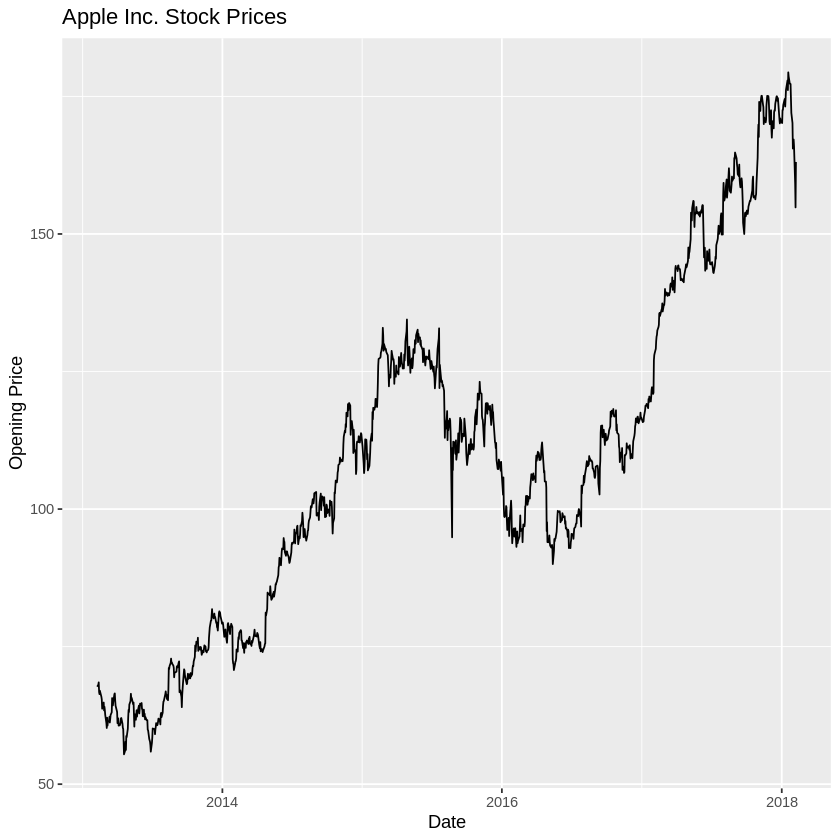

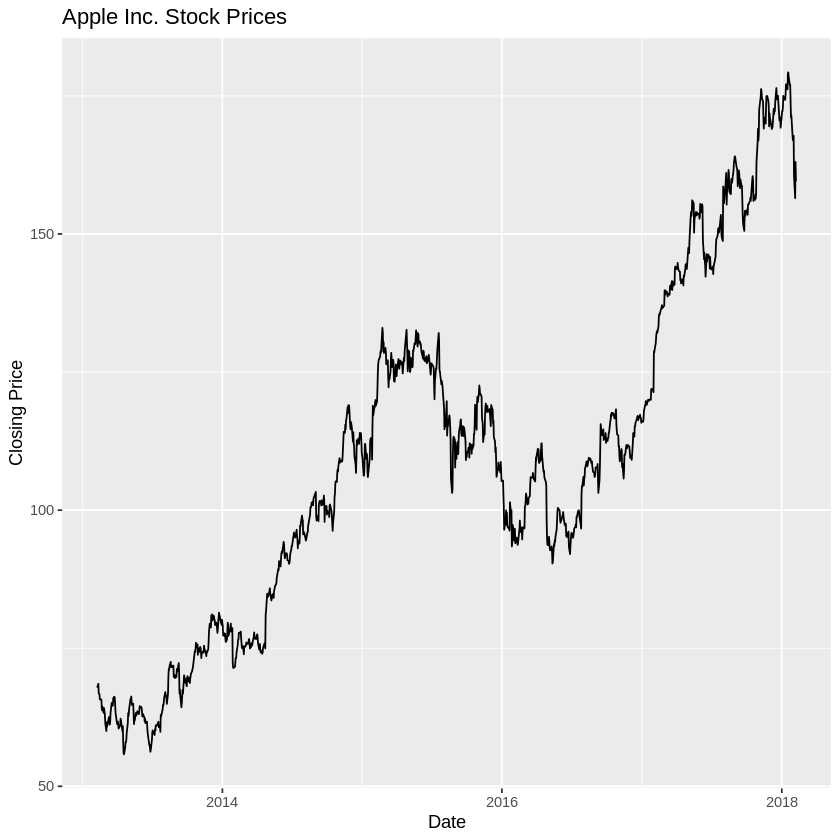

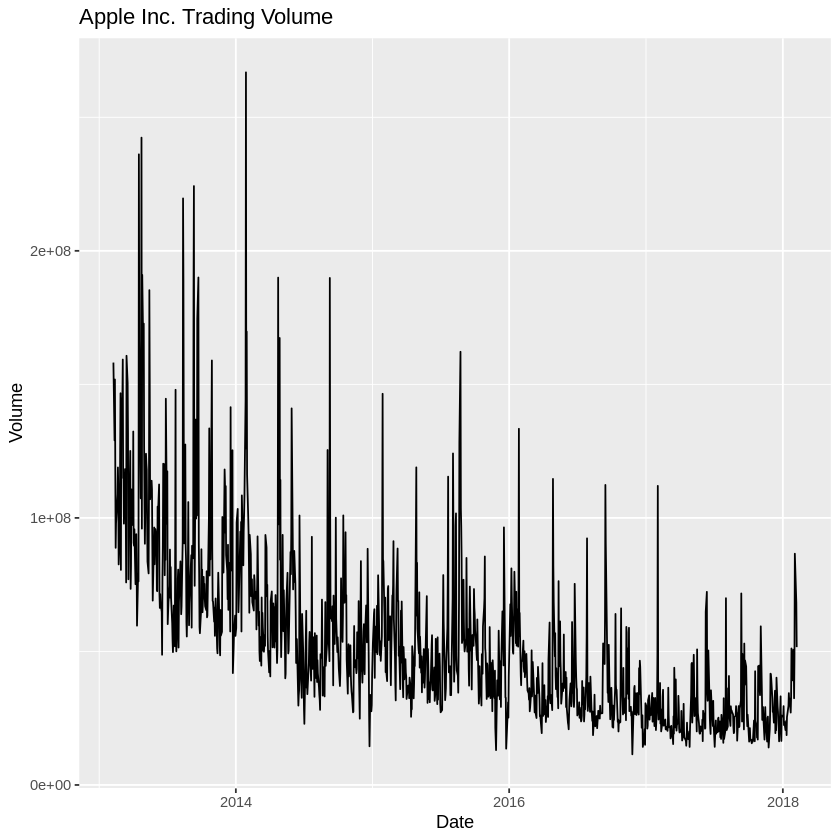

In [6]:
# Plot historical prices for Apple Inc.

ggplot(apple_data, aes(x=date, y=open)) +
  geom_line() +
  labs(title="Apple Inc. Stock Prices", x="Date", y="Opening Price")


ggplot(apple_data, aes(x=date, y=close)) +
  geom_line() +
  labs(title="Apple Inc. Stock Prices", x="Date", y="Closing Price")

# Visualize the trading volume over time
ggplot(apple_data, aes(x=date, y=volume)) +
  geom_line() +
  labs(title="Apple Inc. Trading Volume", x="Date", y="Volume")

**FEATURE ENGINEERING** Feature engineering involves creating new features from the existing ones to enhance the predictive power of the machine learning.  model.

- Arrange by Date, IMPORTANT FOR HISTORICAL DATA: The dataset is sorted by date in ascending order using the command arrange(date).

- Moving Averages ma_7 and ma_30: ma_7: A 7-day moving average of the closing prices is created using zoo::rollmean(close, k=7, fill=NA, align="right"). Moving averages smooth out short-term fluctuations and highlight longer-term trends. ma_30: A 30-day moving average of the closing prices is created similarly.

- Volatility: volatility: The 30-day rolling standard deviation of the closing prices is calculated using zoo::rollapply(close, width=30, FUN=sd, fill=NA, align="right"). Volatility measures the degree of variation in the stock prices over time and is a key indicator of market stability or turbulence.

- Lag Features: lag_1, lag_2, lag_3: Lag features are created using the lag() function. These features represent the closing prices from 1, 2, and 3 days prior, respectively.

- Handling Missing Values: drop_na(): Rows with any missing values introduced by the rolling functions are removed.







In [7]:
# Feature Engineering
apple_data <- apple_data %>%
  arrange(date) %>%
  mutate(ma_7 = zoo::rollmean(close, k=7, fill=NA, align="right"),
         ma_30 = zoo::rollmean(close, k=30, fill=NA, align="right"),
         volatility = zoo::rollapply(close, width=30, FUN=sd, fill=NA, align="right"),
         lag_1 = lag(close, 1),
         lag_2 = lag(close, 2),
         lag_3 = lag(close, 3)) %>%
  drop_na()


**NORMALIZATION**:The normalize function defined here takes an input vector x and scales it to the range [0, 1].

Applying Normalization: The command apple_data %>% mutate(across(c(close, ma_7, ma_30, volatility, lag_1, lag_2, lag_3), normalize)) applies the normalization function to the specified columns (from feature engineering): close, ma_7, ma_30, volatility, lag_1, lag_2, and lag_3. This ensures that all these features are scaled appropriately for model training.

Zero Variance Check: The command block checks for zero variance features using sapply(apple_data %>% select(-date, -Name), var) == 0. Zero variance features have the same value for all data points and do not provide any useful information for the model.



In [8]:
# Normalize the data
normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}

apple_data <- apple_data %>%
  mutate(across(c(close, ma_7, ma_30, volatility, lag_1, lag_2, lag_3), normalize))

# Ensure there are no zero variance features
if (any(sapply(apple_data %>% select(-date, -Name), var) == 0)) {
  stop("Some features have zero variance which can cause numerical instability.")
}

**PART 1 - LSTM MODEL** LSTM (Long Short-Term Memory) models are well-suited for this problem because they excel at capturing long-term dependencies and temporal patterns in sequential data, making them ideal for predicting stock prices based on historical trends.








**DATA PREPARATION AND SPLITTING**

Data Preparation: Setting the Seed: The command set.seed(123) sets a random seed for reproducibility.

Data Splitting: The createDataPartition(apple_data$close, p=0.8, list=FALSE) command splits the dataset into training and testing sets, with 80% of the data used for training and 20% for testing. The training data (train_data) and testing data (test_data) are created using the partition index.

In [12]:
library(caret)

# Prepare the data for LSTM
set.seed(123)
train_index <- createDataPartition(apple_data$close, p=0.8, list=FALSE)
train_data <- apple_data[train_index, ]
test_data <- apple_data[-train_index, ]



**DATA CONVERSION AND RESHAPING**:

Training Data: The commands train_data %>% select(-close, -date, -Name) %>% mutate_all(as.numeric) %>% as.matrix() and train_data$close %>% as.numeric() convert the training features to a numeric matrix (x_train) and the target variable (closing prices) to a numeric vector (y_train).

Testing Data: Similarly, the commands test_data %>% select(-close, -date, -Name) %>% mutate_all(as.numeric) %>% as.matrix() and test_data$close %>% as.numeric() convert the testing features to a numeric matrix (x_test) and the target variable to a numeric vector (y_test).
Reshaping : The array_reshape() function reshapes the input data into the required 3D shape for LSTM models, which is [samples, timesteps, features]. Here, nrow(x_train) and nrow(x_test) represent the number of samples, ncol(x_train) and ncol(x_test) represent the number of timesteps (features in this case), and 1 is the number of features. NOTE THAT the LSTM models expect input data in a 3D tensor format.

In [13]:
# Convert data to numeric to avoid type issues and exclude the date column
x_train <- train_data %>% select(-close, -date, -Name) %>% mutate_all(as.numeric) %>% as.matrix()
y_train <- train_data$close %>% as.numeric()

x_test <- test_data %>% select(-close, -date, -Name) %>% mutate_all(as.numeric) %>% as.matrix()
y_test <- test_data$close %>% as.numeric()

# Reshape input data for LSTM [samples, timesteps, features]
x_train <- array_reshape(x_train, c(nrow(x_train), ncol(x_train), 1))
x_test <- array_reshape(x_test, c(nrow(x_test), ncol(x_test), 1))

**SETTING THE MODEL**
Model Architecture: The model is defined as a sequential model using keras_model_sequential(). The architecture includes:

First LSTM Layer: layer_lstm(units=50, return_sequences=TRUE, input_shape=c(ncol(x_train), 1)). The first layer has 50 units and return_sequences=TRUE to return the full sequence of outputs to the next layer.

The input_shape parameter is set to the number of features in the training data.

Dropout Layer: layer_dropout(rate=0.2)

Dropout is used to prevent overfitting by randomly setting a fraction (20% in this case) of input units to 0 at each update during training.

Second LSTM Layer: layer_lstm(units=50)

Second Dropout Layer: layer_dropout(rate=0.2)

Dense Output Layer: layer_dense(units=1)

A dense layer with a single unit to output the final prediction.

In [14]:
# LSTM model with dropout layers
model <- keras_model_sequential() %>%
  layer_lstm(units=50, return_sequences=TRUE, input_shape=c(ncol(x_train), 1)) %>%
  layer_dropout(rate=0.2) %>%
  layer_lstm(units=50) %>%
  layer_dropout(rate=0.2) %>%
  layer_dense(units=1)


**MODEL COMPILATION**  The model is compiled using the compile function with:

Loss Function: loss='mean_squared_error' - This loss function measures the average squared difference between predicted and actual values.

Optimizer: optimizer_adam(learning_rate=0.0001) - Adam optimizer is used with a reduced learning rate of 0.0001 to improve training stability.

Early Stopping: using callback_early_stopping(monitor="val_loss", patience=10). This callback monitors the validation loss and stops training if it does not improve for 10 consecutive epochs, helping to prevent overfitting.

In [15]:
model %>% compile(  loss='mean_squared_error',
  optimizer=optimizer_adam(learning_rate=0.0001)  # Reduced learning rate
)

# Add early stopping callback
early_stopping <- callback_early_stopping(monitor="val_loss", patience=10)

**MODEL TRAINING**
Training Data: x_train and y_train

Validation Split: validation_split=0.2 - 20% of the training data is used for validation.

Batch Size: batch_size=32 - The number of samples per gradient update.

Epochs: epochs=100 - The number of epochs to train the model.

Verbose: verbose=2 - Verbose output during training.

Callbacks: callbacks=list(early_stopping) - The early stopping callback is included to monitor validation loss.

In [16]:

history <- model %>% fit(
  x_train, y_train,
  epochs=100,
  batch_size=32,
  validation_split=0.2,
  verbose=2,
  callbacks=list(early_stopping)
)

**MODEL EVALUATION**

Predictions: The command lstm_predictions <- model %>% predict(x_test) generates predictions for the test data using the trained LSTM model. These predictions are stored in the variable lstm_predictions.

In [17]:
lstm_predictions <- model %>% predict(x_test)



Calculating Mean Squared Error (MSE): The command lstm_mse <- mean((lstm_predictions - y_test)^2) calculates the Mean Squared Error (MSE) for the LSTM model. MSE measures the average squared difference between the predicted values (lstm_predictions) and the actual values (y_test). A lower MSE indicates better model performance, as it means the predictions are closer to the actual values.

In [18]:
# Evaluate the LSTM model
lstm_mse <- mean((lstm_predictions - y_test)^2)
print(paste("LSTM MSE:", lstm_mse))

[1] "LSTM MSE: 0.00209654862260443"


**PLOTTING THE RESULTS** - TRAINING AND VALIDATION LOSS

Training and Validation Loss Visualization: This plot is crucial for understanding the training process of the LSTM model. It shows how the training and validation loss change over epochs, helping to identify:

Overfitting: If the training loss continues to decrease while the validation loss starts to increase, it indicates overfitting.
Convergence: If both losses decrease and stabilize, it indicates that the model is learning effectively. By analyzing this plot, we can make informed decisions about tuning the model, adjusting hyperparameters, or applying regularization techniques to improve the model's performance.

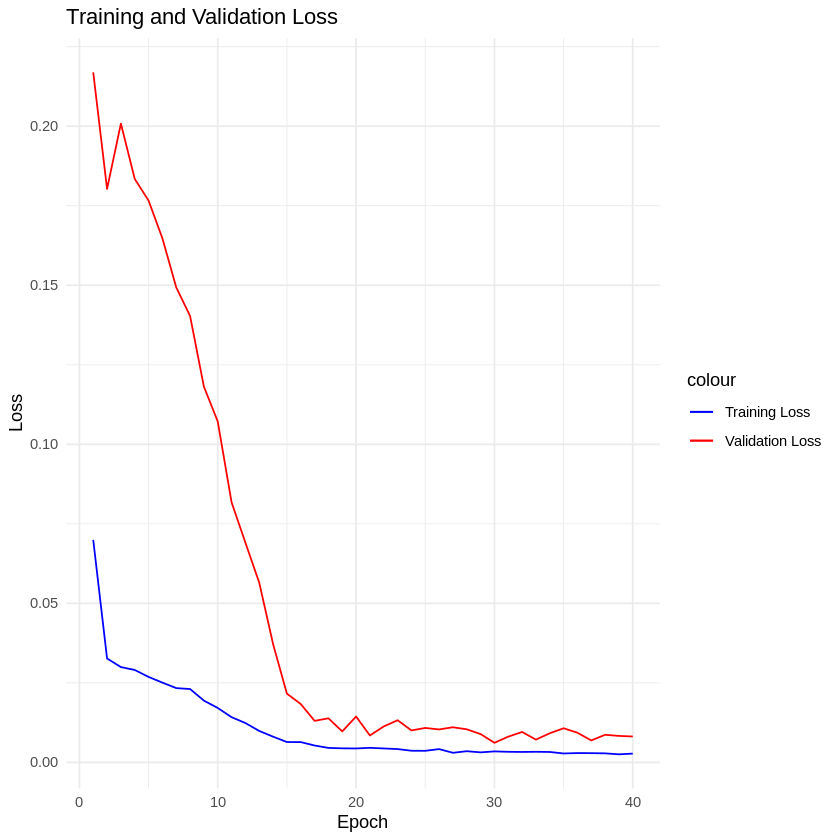

In [19]:
# Convert the training history to a data frame
history_df <- data.frame(
  epoch = 1:length(history$metrics$loss),
  loss = history$metrics$loss,
  val_loss = history$metrics$val_loss
)
# Plot training and validation loss
ggplot(history_df, aes(x=epoch)) +
  geom_line(aes(y=loss, color="Training Loss")) +
  geom_line(aes(y=val_loss, color="Validation Loss")) +
  labs(title="Training and Validation Loss",
       y="Loss",
       x="Epoch") +
  scale_color_manual(values=c("Training Loss"="blue", "Validation Loss"="red")) +
  theme_minimal()


PLOTTING THE RESULTS - ACTUAL VS PREDICTED VALUES

This plot is essential for evaluating the performance of the LSTM model. It visually compares the predicted stock prices against the actual stock prices over time, allowing us to assess how closely the model's predictions align with reality. By analyzing this plot, we can determine:

Accuracy: How well the model captures the trends and fluctuations in stock prices. Timing: Whether the model's predictions are timely and consistent with actual price movements.


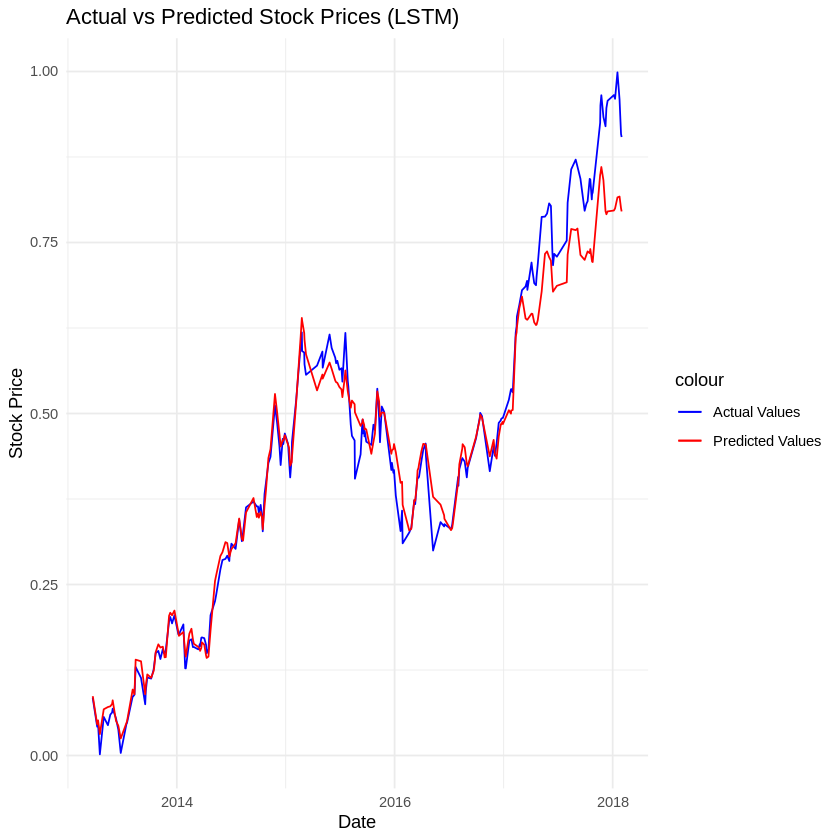

In [32]:
# Create a data frame for actual vs predicted values
results_df <- data.frame(
  date = test_data$date,
  actual = y_test,
  predicted = lstm_predictions
)

# Plot actual vs predicted values
ggplot(results_df, aes(x=date)) +
  geom_line(aes(y=actual, color="Actual Values")) +
  geom_line(aes(y=predicted, color="Predicted Values")) +
  labs(title="Actual vs Predicted Stock Prices (LSTM)",
       y="Stock Price",
       x="Date") +
  scale_color_manual(values=c("Actual Values"="blue", "Predicted Values"="red")) +
  theme_minimal()

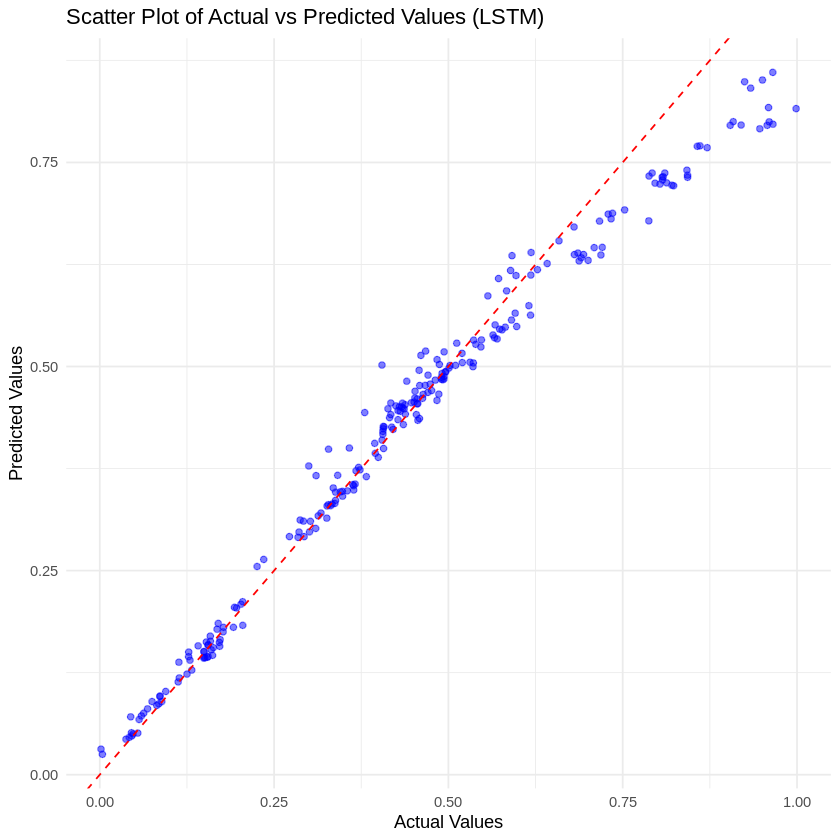

In [37]:
# Scatter plot of actual vs predicted values
scatter_plot <- ggplot(results_df, aes(x=actual, y=predicted)) +
  geom_point(color="blue", alpha=0.5) +
  geom_abline(intercept=0, slope=1, color="red", linetype="dashed") +
  labs(title="Scatter Plot of Actual vs Predicted Values (LSTM)",
       x="Actual Values",
       y="Predicted Values") +
  theme_minimal()

print(scatter_plot)

PLOTTING ADDITIONAL METRICS

This bar plot provides a clear and concise summary of the model's performance metrics. It allows for easy comparison of the different metrics, helping to communicate the effectiveness of the LSTM model in predicting stock prices. By visualizing MAE, RMSE, and R², we can quickly assess the accuracy and reliability of the model.


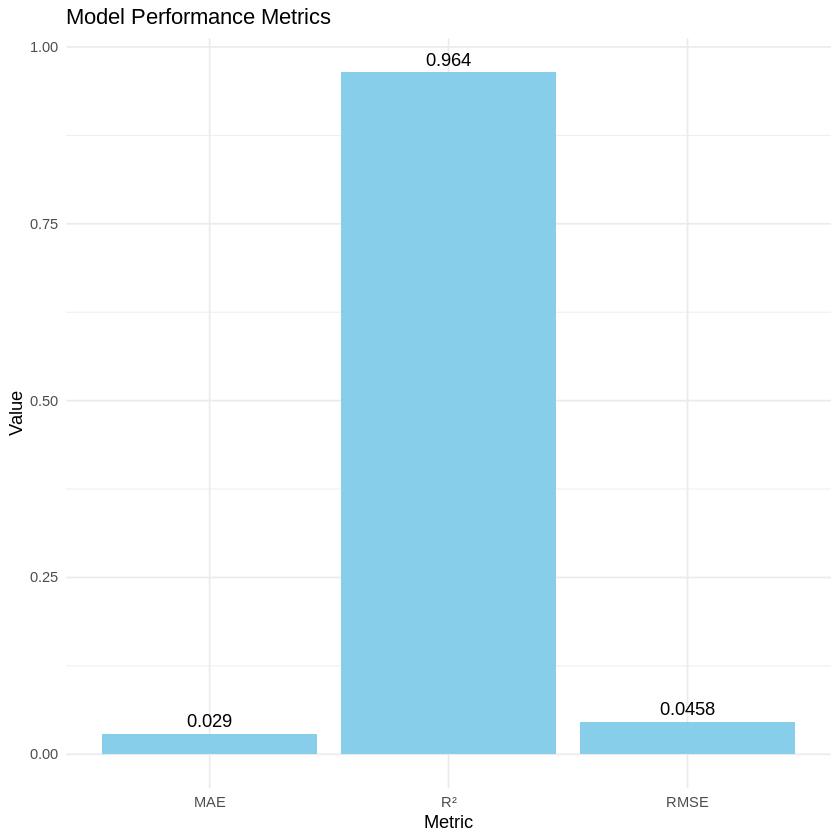

In [21]:
# Calculate additional metrics
mae <- mean(abs(lstm_predictions - y_test))
rmse <- sqrt(mean((lstm_predictions - y_test)^2))
r_squared <- 1 - sum((y_test - lstm_predictions)^2) / sum((y_test - mean(y_test))^2)

# Create a data frame for metrics
metrics_df <- data.frame(
  Metric = c("MAE", "RMSE", "R²"),
  Value = c(mae, rmse, r_squared)
)

# Plot the metrics
metrics_plot <- ggplot(metrics_df, aes(x=Metric, y=Value)) +
  geom_bar(stat="identity", fill="skyblue") +
  geom_text(aes(label=round(Value, 4)), vjust=-0.5) +
  labs(title="Model Performance Metrics",
       y="Value",
       x="Metric") +
  theme_minimal()

# Display the plot
print(metrics_plot)


**PART 2 - RANDOM FOREST MODEL**

Random Forest is a powerful ensemble learning method that constructs multiple decision trees during training and merges them to get more accurate and stable predictions. Random Forest reduces the risk of overfitting, which is common in individual decision trees, by averaging the results of multiple trees.
Handling Non-Linearity: It can capture complex non-linear relationships between the features and the target variable, which is essential for modeling stock prices. Random Forest provides a measure of feature importance, helping to identify which features have the most impact on the prediction.
Versatility: It can handle both regression and classification tasks, making it a versatile choice for various types of predictive modeling.

**BUILDING THE MODEL**

Training the Random Forest Model:
The command rf_model <- randomForest(close ~ ma_7 + ma_30 + volatility + lag_1 + lag_2 + lag_3, data=train_data, ntree=100) trains a Random Forest model using the training data (train_data). The formula specifies that close is the target variable, while ma_7, ma_30, volatility, lag_1, lag_2, and lag_3 are the predictor variables. The model is trained with 100 trees (ntree=100), which is a good balance between performance and computational efficiency.

The command rf_predictions <- predict(rf_model, newdata=test_data) generates predictions on the test data (test_data) using the trained Random Forest model. These predictions are stored in the variable rf_predictions.

In [24]:
library(randomForest)

# Random Forest model
rf_model <- randomForest(close ~ ma_7 + ma_30 + volatility + lag_1 + lag_2 + lag_3, data=train_data, ntree=100)

# Random Forest predictions
rf_predictions <- predict(rf_model, newdata=test_data)


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




**PLOTTING THE METRICS**

This bar plot provides a clear and concise summary of the Random Forest model's performance metrics. It allows for easy comparison of the different metrics, helping to communicate the effectiveness of the Random Forest model in predicting stock prices. By visualizing MAE, RMSE, and R², we can quickly assess the accuracy and reliability of the model.



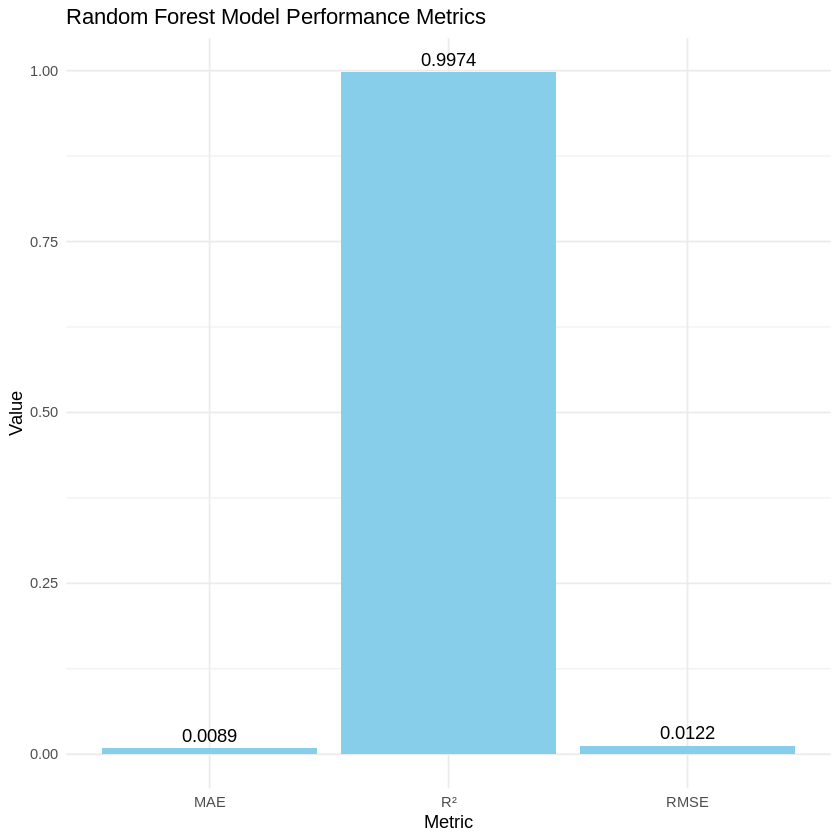

In [25]:

rf_mae <- mean(abs(rf_predictions - test_data$close))
rf_rmse <- sqrt(mean((rf_predictions - test_data$close)^2))
rf_r_squared <- 1 - sum((test_data$close - rf_predictions)^2) / sum((test_data$close - mean(test_data$close))^2)

# Create a data frame for metrics
rf_metrics_df <- data.frame(
  Metric = c("MAE", "RMSE", "R²"),
  Value = c(rf_mae, rf_rmse, rf_r_squared)
)

# Plot the metrics
rf_metrics_plot <- ggplot(rf_metrics_df, aes(x=Metric, y=Value)) +
  geom_bar(stat="identity", fill="skyblue") +
  geom_text(aes(label=round(Value, 4)), vjust=-0.5) +
  labs(title="Random Forest Model Performance Metrics",
       y="Value",
       x="Metric") +
  theme_minimal()

# Display the plot
print(rf_metrics_plot)

**FEATURE IMPORTANCE**

This feature importance plot provides insights into which features contribute the most to the Random Forest model's predictions. Identify Key Predictors: Determine which features are most influential in predicting stock prices.
Model Interpretation: Gain a better understanding of the model's decision-making process. Feature Selection: Make informed decisions about which features to include or exclude in future models to improve performance.


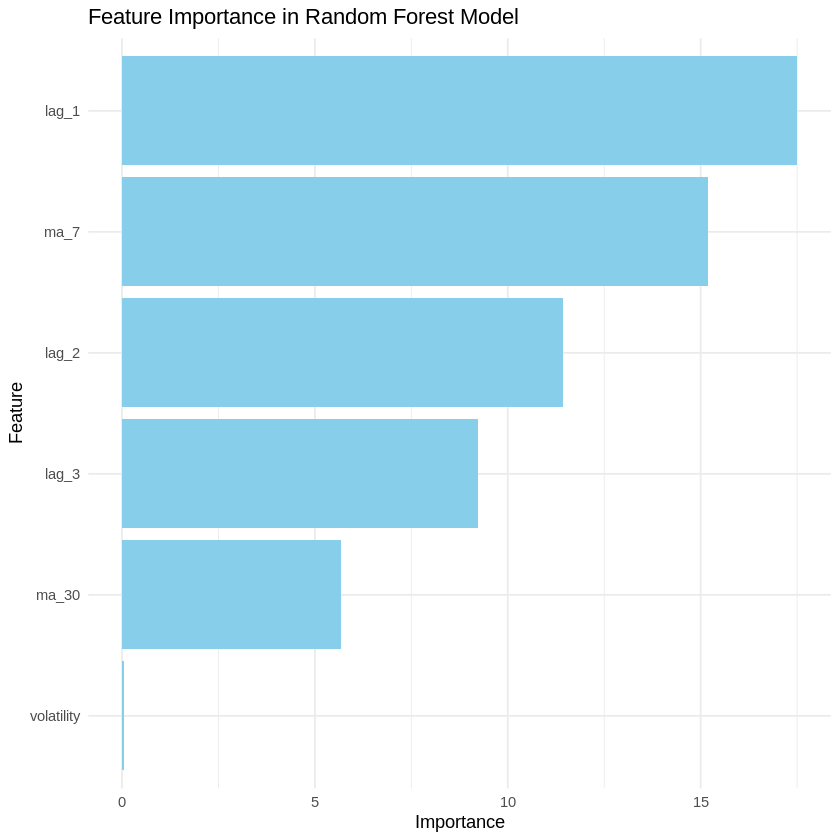

In [27]:
# Get feature importance
feature_importance <- importance(rf_model)
feature_importance_df <- data.frame(
  Feature = rownames(feature_importance),
  Importance = feature_importance[, 1]
)

# Plot feature importance
feature_importance_plot <- ggplot(feature_importance_df, aes(x=reorder(Feature, Importance), y=Importance)) +
  geom_bar(stat="identity", fill="skyblue") +
  coord_flip() +
  labs(title="Feature Importance in Random Forest Model",
       y="Importance",
       x="Feature") +
  theme_minimal()

# Display the plot
print(feature_importance_plot)

**RESIDUALS**

This error distribution plot provides insights into the prediction errors made by the Random Forest model. Check for any systematic bias in the model's predictions (e.g., consistently overestimating or underestimating). Identify any large errors or outliers that might indicate problematic predictions.


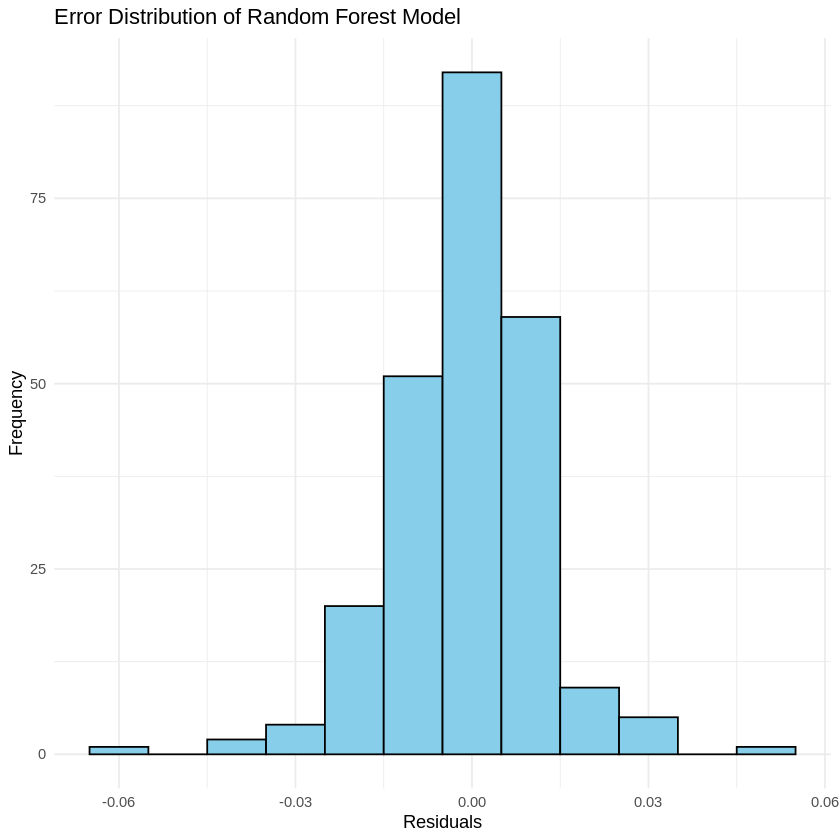

In [28]:
# Calculate residuals
residuals <- test_data$close - rf_predictions

# Plot error distribution
error_distribution_plot <- ggplot(data.frame(residuals=residuals), aes(x=residuals)) +
  geom_histogram(binwidth=0.01, fill="skyblue", color="black") +
  labs(title="Error Distribution of Random Forest Model",
       x="Residuals",
       y="Frequency") +
  theme_minimal()

# Display the plot
print(error_distribution_plot)


**ACTUAL VS PREDICTED VALUES**

This plot is essential for evaluating the performance of the Random Forest model. It visually compares the predicted stock prices against the actual stock prices over time, allowing us to assess how closely the model's predictions align with reality. How well the model captures the trends and fluctuations in stock prices. Whether the model's predictions are timely and consistent with actual price movements.



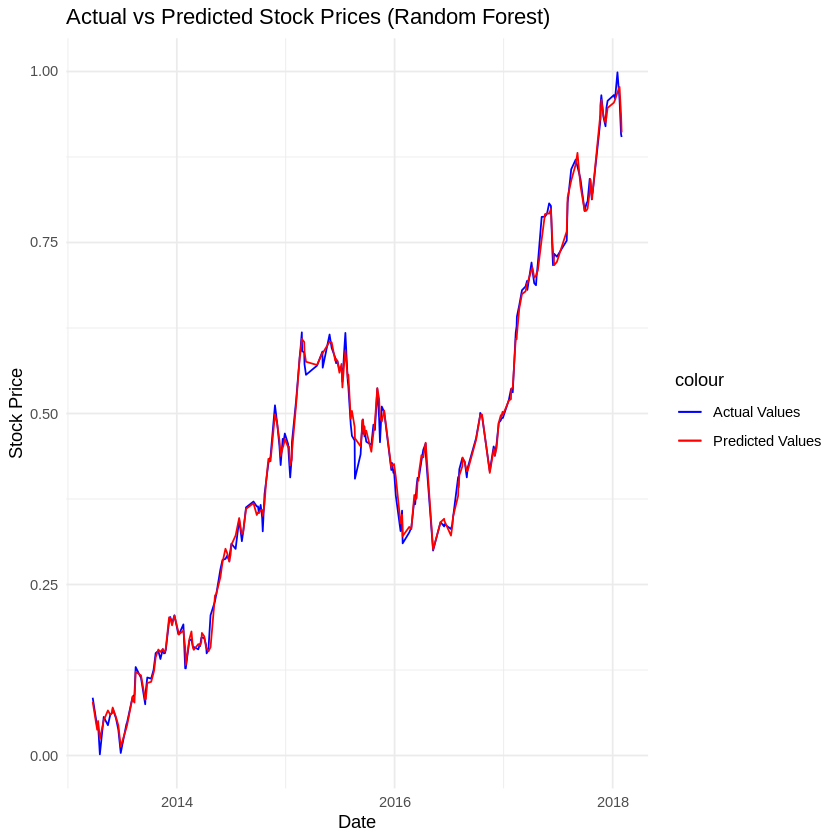

In [29]:
# Create a data frame for actual vs predicted values (Random Forest)
rf_results_df <- data.frame(
  date = test_data$date,
  actual = test_data$close,
  predicted = rf_predictions
)

# Plot actual vs predicted values for Random Forest
rf_prediction_plot <- ggplot(rf_results_df, aes(x=date)) +
  geom_line(aes(y=actual, color="Actual Values")) +
  geom_line(aes(y=predicted, color="Predicted Values")) +
  labs(title="Actual vs Predicted Stock Prices (Random Forest)",
       y="Stock Price",
       x="Date") +
  scale_color_manual(values=c("Actual Values"="blue", "Predicted Values"="red")) +
  theme_minimal()

# Display the plot
print(rf_prediction_plot)

This plot tell us how well the predicted values align with the actual values. Points closely aligned along the diagonal line indicate high accuracy. Any points significantly deviating from the diagonal line indicate large prediction errors. Systematic deviations from the diagonal line can reveal biases in the model's predictions (e.g., consistently overestimating or underestimating).

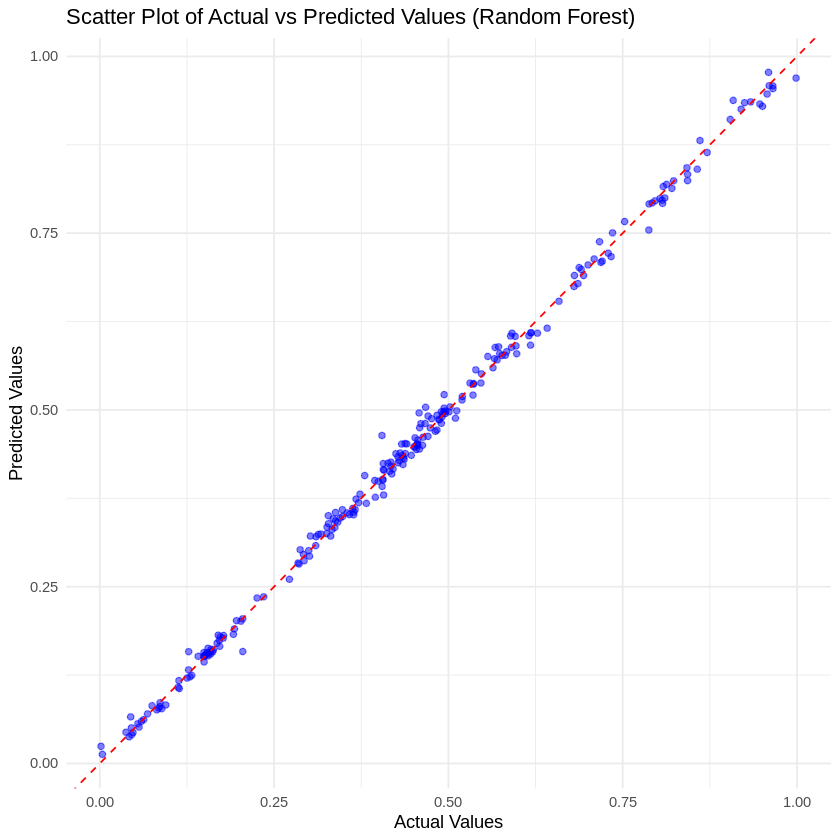

In [31]:
# Scatter plot of actual vs predicted values
scatter_plot <- ggplot(rf_results_df, aes(x=actual, y=predicted)) +
  geom_point(color="blue", alpha=0.5) +
  geom_abline(intercept=0, slope=1, color="red", linetype="dashed") +
  labs(title="Scatter Plot of Actual vs Predicted Values (Random Forest)",
       x="Actual Values",
       y="Predicted Values") +
  theme_minimal()

print(scatter_plot)



---



**MODELS COMPARASION**


- LSTM Model:

Mean Squared Error (MSE): 0.00209654862260443
Performance: The LSTM model demonstrated a strong capability to capture the temporal dependencies in the stock price data, as evident from the low MSE value.

Visualization:
The actual vs. predicted stock prices plot for the LSTM model shows a close alignment, indicating the model's ability to predict future prices accurately. The scatter plot of actual vs. predicted values highlights a strong correlation, with most points lying close to the diagonal line, further validating the model's performance.
- Random Forest Model:

Mean Absolute Error (MAE): 0.00887227026398546
Root Mean Squared Error (RMSE): 0.0122053842989215
R-squared (R²): 0.997445058510328
Performance: The Random Forest model also performed exceptionally well, with very low MAE and RMSE values and an R² value close to 1, indicating high accuracy.

The actual vs. predicted stock prices plot for the Random Forest model shows an excellent fit, with predicted values closely following the actual stock prices.
The scatter plot of actual vs. predicted values for the Random Forest model shows a nearly perfect alignment along the diagonal line, indicating very accurate predictions.

Both models performed exceptionally well, with the Random Forest model having slightly lower error metrics. This suggests that the Random Forest model might be slightly more accurate in this context.

Feature Importance: The Random Forest model provided insights into feature importance, highlighting which features (such as moving averages and volatility) significantly influence the stock price predictions.

Temporal Dependencies: The LSTM model effectively captured temporal dependencies due to its architecture designed for sequential data, making it particularly suitable for time-series prediction tasks like stock price forecasting.

Actual vs. Predicted Plots: Both models show a strong alignment between actual and predicted values, indicating their robustness in predicting stock prices.

Scatter Plots: The scatter plots show a high correlation between actual and predicted values, with points closely clustered around the diagonal line, suggesting accurate and unbiased predictions.





---



**CONCLUSIONS**

In this project, we developed and evaluated two different models, LSTM and Random Forest, to predict the stock prices of Apple Inc. based on historical data.
This project demonstrates the effectiveness of using both traditional machine learning models (Random Forest) and deep learning models (LSTM) for stock price prediction. Each model has its strengths, and the choice between them can depend on specific use cases and requirements. For example, Random Forest provides feature importance insights, while LSTM excels in capturing temporal patterns.By leveraging these models, financial analysts and investors can gain valuable insights and make more informed decisions based on accurate stock price forecasts. Future enhancements could include incorporating additional external factors like economic indicators .









